In [2]:
import numpy as py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Pre-work: Sort data in chronological order

In [3]:
data = pd.read_csv("Datasets/10years_data.csv")

data

,Date,Price,Open,High,Low,Vol.,Change %
0,12/31/2024,"1,642.33","1,638.43","1,644.54","1,632.85",161.32M,0.28%
1,12/30/2024,"1,637.68","1,626.14","1,638.56","1,624.92",134.71M,0.59%
2,12/27/2024,"1,628.14","1,617.56","1,632.63","1,616.69",130.61M,0.89%
3,12/26/2024,"1,613.70","1,603.58","1,615.28","1,602.79",120.93M,0.67%
4,12/24/2024,"1,602.99","1,596.64","1,603.89","1,596.64",95.05M,0.43%
...,...,...,...,...,...,...,...
2447,01/07/2015,"1,709.18","1,714.70","1,717.17","1,706.18",171.02M,-0.43%
2448,01/06/2015,"1,716.58","1,730.94","1,730.94","1,708.78",146.06M,-1.15%
2449,01/05/2015,"1,736.62","1,758.43","1,759.15","1,734.51",98.14M,-0.92%
2450,01/02/2015,"1,752.77","1,757.15","1,757.96","1,741.45",63.58M,-0.48%


In [4]:
data["Date"]=pd.to_datetime(data["Date"],format="%m/%d/%Y")
data.sort_values(by="Date")

,Date,Price,Open,High,Low,Vol.,Change %
2451,2014-12-31,"1,761.25","1,759.76","1,768.85","1,755.93",140.84M,-0.32%
2450,2015-01-02,"1,752.77","1,757.15","1,757.96","1,741.45",63.58M,-0.48%
2449,2015-01-05,"1,736.62","1,758.43","1,759.15","1,734.51",98.14M,-0.92%
2448,2015-01-06,"1,716.58","1,730.94","1,730.94","1,708.78",146.06M,-1.15%
2447,2015-01-07,"1,709.18","1,714.70","1,717.17","1,706.18",171.02M,-0.43%
...,...,...,...,...,...,...,...
4,2024-12-24,"1,602.99","1,596.64","1,603.89","1,596.64",95.05M,0.43%
3,2024-12-26,"1,613.70","1,603.58","1,615.28","1,602.79",120.93M,0.67%
2,2024-12-27,"1,628.14","1,617.56","1,632.63","1,616.69",130.61M,0.89%
1,2024-12-30,"1,637.68","1,626.14","1,638.56","1,624.92",134.71M,0.59%


Export sorted dataset

In [5]:
data.to_csv("Datasets/KLCI_data.csv",index=False)

Import sorted data

In [6]:
KLCI_data = pd.read_csv("Datasets/KLCI_data.csv")

# Exploratory Data Analysis

Checks missing value

In [7]:
KLCI_data.isnull().any()

Date        False
Price       False
Open        False
High        False
Low         False
Vol.         True
Change %    False
dtype: bool

In [8]:
nullRows = KLCI_data[KLCI_data['Vol.'].isnull()]

nullRows

,Date,Price,Open,High,Low,Vol.,Change %
73,2024-09-17,"1,664.28","1,654.31","1,664.99","1,651.55",NaN,0.73%


Empty value found, using backward filling to fill

In [9]:
# fill missing value using backward fill
KLCI_data=KLCI_data.bfill()

In [10]:
print("Row 73\n")
print(KLCI_data.iloc[73])
print("\nRow 74\n")
print(KLCI_data.iloc[74])

Row 73

Date        2024-09-17
Price         1,664.28
Open          1,654.31
High          1,664.99
Low           1,651.55
Vol.           234.70M
Change %         0.73%
Name: 73, dtype: object

Row 74

Date        2024-09-13
Price         1,652.15
Open          1,642.63
High          1,652.25
Low           1,638.44
Vol.           234.70M
Change %         0.84%
Name: 74, dtype: object


Convert data type

In [11]:
KLCI_data['Date'] = pd.to_datetime(KLCI_data['Date'],format='%Y-%m-%d')
KLCI_data.dtypes

Date        datetime64[ns]
Price               object
Open                object
High                object
Low                 object
Vol.                object
Change %            object
dtype: object

In [12]:
columns_to_convert = ['Price','Open','High','Low']

for i in range(4):
    KLCI_data[columns_to_convert[i]]=KLCI_data[columns_to_convert[i]].str.replace(',','').astype(float)

KLCI_data['Vol.']=KLCI_data['Vol.'].str.replace('M','').astype(float)*1e6

KLCI_data['Change %']=KLCI_data['Change %'].str.replace('%','').astype(float)/100


print("Data types")
print(KLCI_data.dtypes)

KLCI_data

Data types
Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %           float64
dtype: object


,Date,Price,Open,High,Low,Vol.,Change %
0,2024-12-31,1642.33,1638.43,1644.54,1632.85,161320000.0,0.0028
1,2024-12-30,1637.68,1626.14,1638.56,1624.92,134710000.0,0.0059
2,2024-12-27,1628.14,1617.56,1632.63,1616.69,130610000.0,0.0089
3,2024-12-26,1613.70,1603.58,1615.28,1602.79,120930000.0,0.0067
4,2024-12-24,1602.99,1596.64,1603.89,1596.64,95050000.0,0.0043
...,...,...,...,...,...,...,...
2447,2015-01-07,1709.18,1714.70,1717.17,1706.18,171020000.0,-0.0043
2448,2015-01-06,1716.58,1730.94,1730.94,1708.78,146060000.0,-0.0115
2449,2015-01-05,1736.62,1758.43,1759.15,1734.51,98140000.0,-0.0092
2450,2015-01-02,1752.77,1757.15,1757.96,1741.45,63580000.0,-0.0048


In [13]:
KLCI_data

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-12-31,1642.33,1638.43,1644.54,1632.85,161320000.0,0.0028
1,2024-12-30,1637.68,1626.14,1638.56,1624.92,134710000.0,0.0059
2,2024-12-27,1628.14,1617.56,1632.63,1616.69,130610000.0,0.0089
3,2024-12-26,1613.70,1603.58,1615.28,1602.79,120930000.0,0.0067
4,2024-12-24,1602.99,1596.64,1603.89,1596.64,95050000.0,0.0043
...,...,...,...,...,...,...,...
2447,2015-01-07,1709.18,1714.70,1717.17,1706.18,171020000.0,-0.0043
2448,2015-01-06,1716.58,1730.94,1730.94,1708.78,146060000.0,-0.0115
2449,2015-01-05,1736.62,1758.43,1759.15,1734.51,98140000.0,-0.0092
2450,2015-01-02,1752.77,1757.15,1757.96,1741.45,63580000.0,-0.0048


export cleaed dataset

In [25]:
KLCI_data.to_csv("Datasets/cleanedData.csv",index=False)

fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1,figsize=(10, 15))

ax1.plot(KLCI_data['Date'],KLCI_data['Open'])
ax1.axhline(y=KLCI_data['Open'].mean(),linestyle='--',color='r')
ax1.set(label="Open price and Close price",ylabel="Open price",xlabel="Date")

ax2.plot(KLCI_data['Date'],KLCI_data['High'])
ax2.axhline(y=KLCI_data['High'].mean(),linestyle='--',color='r')
ax2.set(label="Highest price and Close price",ylabel="High price",xlabel="Date")

ax3.plot(KLCI_data['Date'],KLCI_data['Low'])
ax3.axhline(y=KLCI_data['Low'].mean(),linestyle='--',color='r')
ax3.set(label="Lowest price and Close price",ylabel="Low price",xlabel="Date")

ax4.plot(KLCI_data['Date'],KLCI_data['Price'])
ax4.axhline(y=KLCI_data['Price'].mean(),linestyle='--',color='r')
ax4.set(label="Lowest price and Close price",ylabel="Close Price",xlabel="Date")





plt.show()

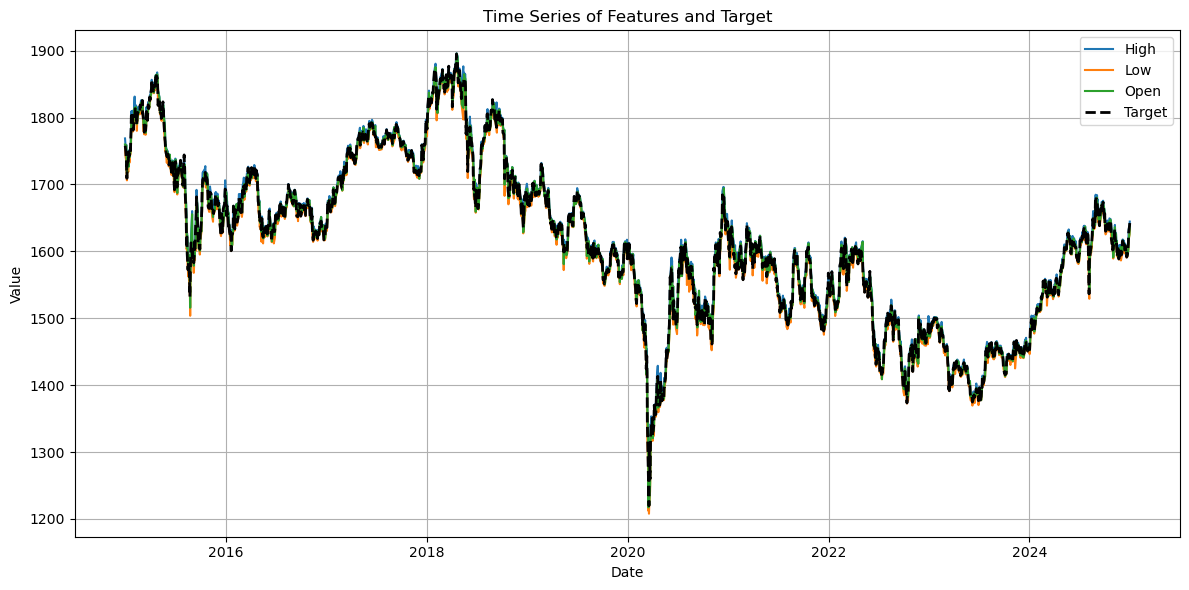

In [15]:
# set 'Date' as index
KLCI_data.set_index('Date', inplace=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(KLCI_data.index, KLCI_data['High'], label='High')
plt.plot(KLCI_data.index, KLCI_data['Low'], label='Low')
plt.plot(KLCI_data.index, KLCI_data['Open'], label='Open')

plt.plot(KLCI_data.index, KLCI_data['Price'], label='Target', linewidth=2, linestyle='--', color='black')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series of Features and Target')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
KLCI_data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2014-12-31,1761.25,1759.76,1768.85,1755.93,140840000.0,-0.0032
2015-01-02,1752.77,1757.15,1757.96,1741.45,63580000.0,-0.0048
2015-01-05,1736.62,1758.43,1759.15,1734.51,98140000.0,-0.0092
2015-01-06,1716.58,1730.94,1730.94,1708.78,146060000.0,-0.0115
2015-01-07,1709.18,1714.70,1717.17,1706.18,171020000.0,-0.0043
...,...,...,...,...,...,...
2024-12-24,1602.99,1596.64,1603.89,1596.64,95050000.0,0.0043
2024-12-26,1613.70,1603.58,1615.28,1602.79,120930000.0,0.0067
2024-12-27,1628.14,1617.56,1632.63,1616.69,130610000.0,0.0089


Finding correlation and plot using heatmap

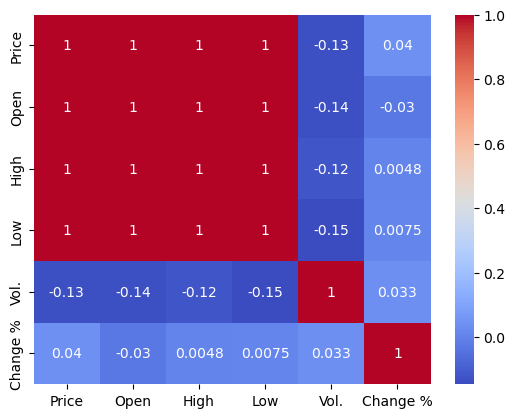

In [28]:
data_correlation = KLCI_data.corr()

sns.heatmap(data_correlation,annot=True,cmap='coolwarm')

plt.show()

Data Splitting and Model Training (Time Series Split)

Split 0
Train: 2014-12-31 00:00:00 to 2016-08-30 00:00:00
Test:  2016-09-01 00:00:00 to 2018-05-02 00:00:00

 MAE: 3.5337703431373293
 MSE: 27.12003420483178
 RMSE: 5.207689910587206


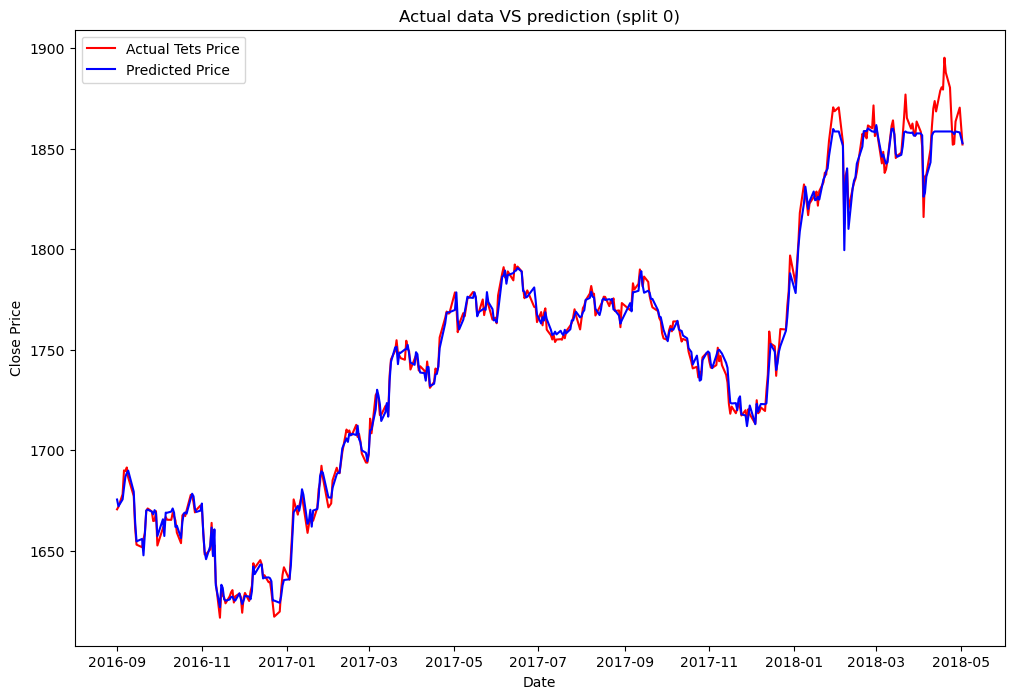

Split 1
Train: 2014-12-31 00:00:00 to 2018-05-02 00:00:00
Test:  2018-05-03 00:00:00 to 2020-01-07 00:00:00

 MAE: 4.083259803921666
 MSE: 32.447231095148915
 RMSE: 5.696247106222562


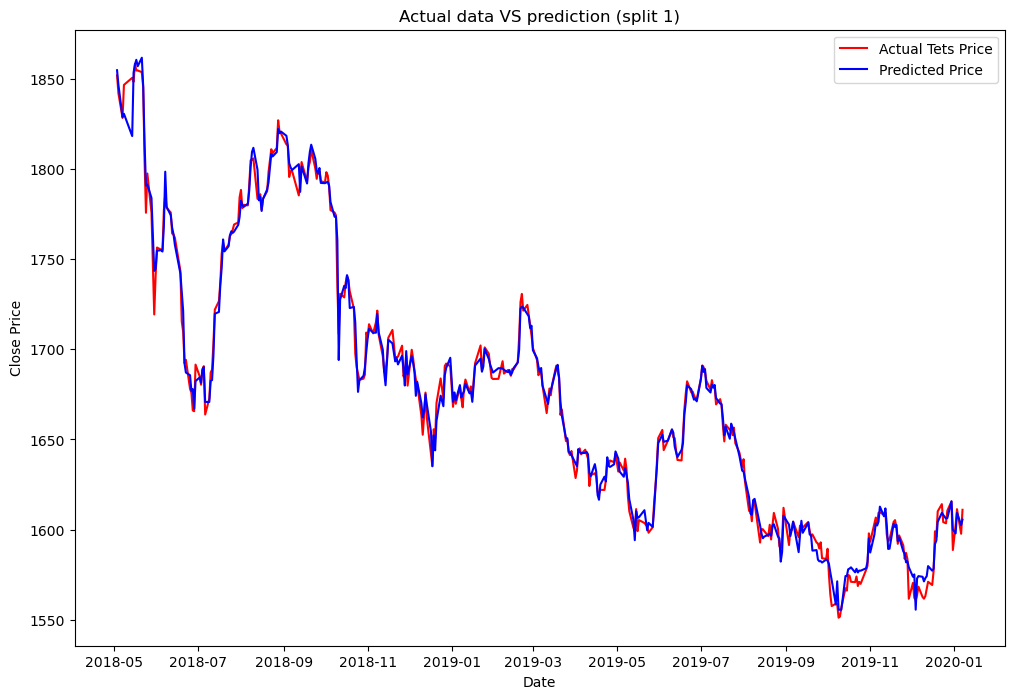

Split 2
Train: 2014-12-31 00:00:00 to 2020-01-07 00:00:00
Test:  2020-01-08 00:00:00 to 2021-09-03 00:00:00

 MAE: 35.21252352941197
 MSE: 4698.148093326982
 RMSE: 68.54303825573376


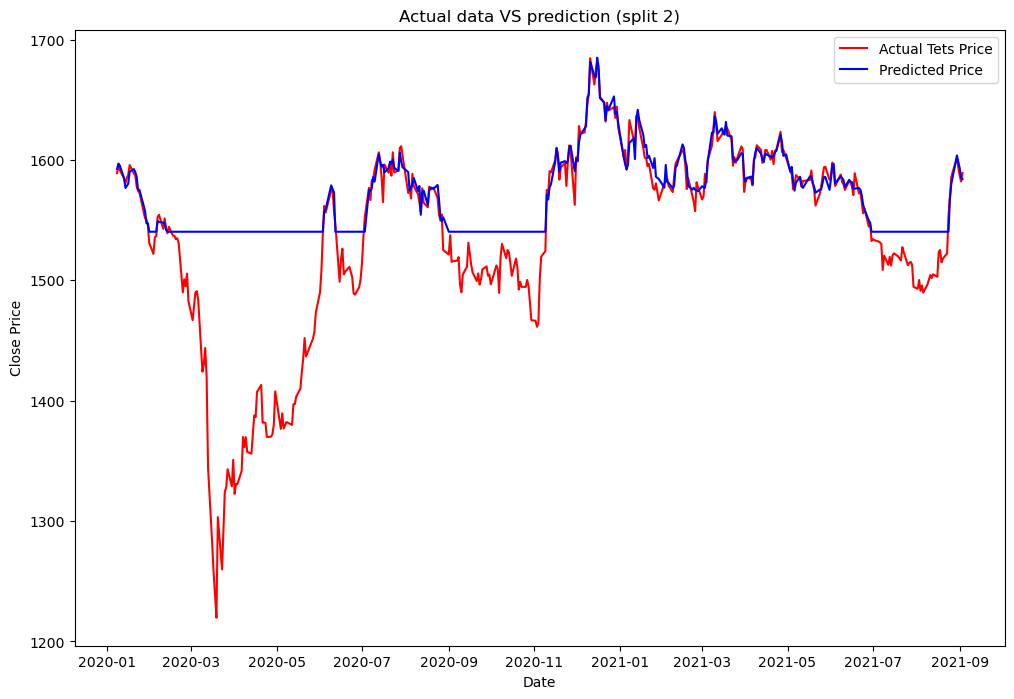

Split 3
Train: 2014-12-31 00:00:00 to 2021-09-03 00:00:00
Test:  2021-09-06 00:00:00 to 2023-05-10 00:00:00

 MAE: 4.228094362745195
 MSE: 30.53157886943766
 RMSE: 5.525538785443249


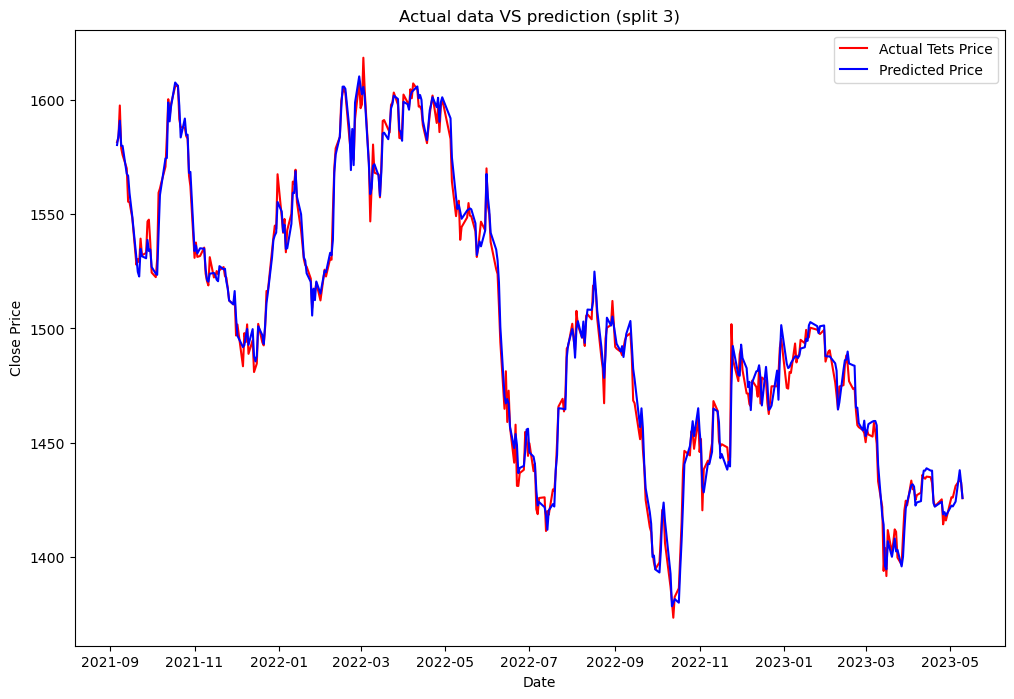

Split 4
Train: 2014-12-31 00:00:00 to 2023-05-10 00:00:00
Test:  2023-05-11 00:00:00 to 2024-12-31 00:00:00

 MAE: 3.0192125000001386
 MSE: 16.31245920708427
 RMSE: 4.038868555311533


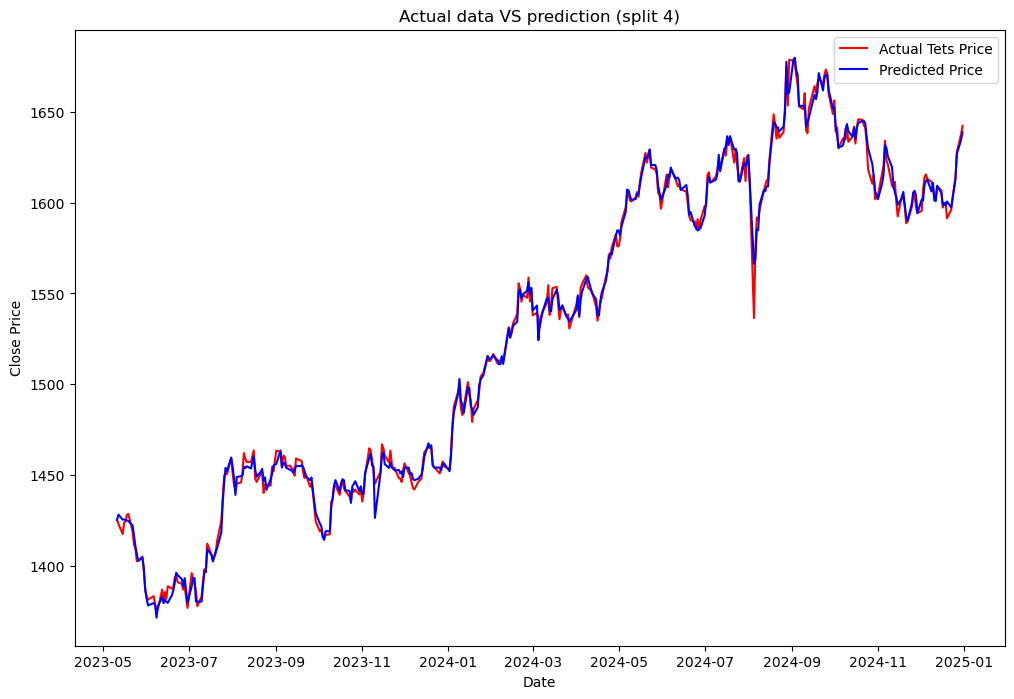

Average MAE: 10.02
Average MSE: 960.91
Average RMSE: 17.80


In [30]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np

np.random.seed(42)
tss = TimeSeriesSplit(n_splits=5)

KLCI_data_filtered = KLCI_data[KLCI_data.index.year != 2020]

# test and see if the performance better
X = KLCI_data.drop(columns=['Price','Vol.','Change %'])
Y = KLCI_data['Price']

# X = KLCI_data_filtered.drop(columns=['Price','Vol.','Change %'])
# Y = KLCI_data_filtered['Price']

mae = []
mse= []
rmse = []
model_rfr = RandomForestRegressor()

for i,(train_index,test_index) in enumerate(tss.split(X)):
    X_train, X_test=X.iloc[train_index],X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index],Y.iloc[test_index]

    model_rfr.fit(X_train,Y_train)
    y_pred = model_rfr.predict(X_test)

    mae.append(mean_absolute_error(Y_test,y_pred))
    mse.append(mean_squared_error(Y_test,y_pred))
    rmse.append(root_mean_squared_error(Y_test,y_pred))


    print(f"Split {i}")
    print(f"Train: {X_train.index[0]} to {X_train.index[-1]}")
    print(f"Test:  {X_test.index[0]} to {X_test.index[-1]}\n")

    print(f" MAE: {mean_absolute_error(Y_test,y_pred)}")
    print(f" MSE: {mean_squared_error(Y_test,y_pred)}")
    print(f" RMSE: {root_mean_squared_error(Y_test,y_pred)}")

    plt.figure(figsize=(12,8))

    plt.plot(Y_test.index,Y_test, color='red',label='Actual Tets Price')
    plt.plot(Y_test.index,y_pred, color='blue',label='Predicted Price')
    plt.title(f'Actual data VS prediction (split {i})')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()

    plt.show()

print(f"Average MAE: {np.mean(mae):.2f}")
print(f"Average MSE: {np.mean(mse):.2f}")
print(f"Average RMSE: {np.mean(rmse):.2f}")




### Future Prediction

### Prediction functions for training features and target

In [20]:
from sklearn.ensemble import RandomForestRegressor
tss = TimeSeriesSplit(n_splits=5)

# predict close price (target feature)
def predict_Close():
    Close_X = KLCI_data.drop(columns=['Price','Vol.','Change %'])
    Close_Y = KLCI_data['Price']

    for i,(train_index,test_index) in enumerate(tss.split(X)):
        Close_X_train, Close_X_test=Close_X.iloc[train_index],Close_X.iloc[test_index]
        Close_Y_train, Close_Y_test = Close_Y.iloc[train_index],Close_Y.iloc[test_index]

        print(f"Split {i}")
        print(f"Train: {Close_X_train.index[0]} to {Close_X_train.index[-1]}")
        print(f"Test:  {Close_X_test.index[0]} to {Close_X_test.index[-1]}\n")


    Close_model_rfr = RandomForestRegressor(random_state=42)

    Close_model_rfr.fit(Close_X_train,Close_Y_train)

    prediction = Close_model_rfr.predict(X_test)

    # print(f"Prediction for Close Price: {prediction}")


    return Close_X.iloc[[-1]].copy(), Close_model_rfr


# predict high price
def predict_High():
    High_X = KLCI_data.drop(columns=['Price','High','Vol.','Change %'])
    High_Y = KLCI_data['High']

    for i,(train_index,test_index) in enumerate(tss.split(X)):
        High_X_train, High_X_test=High_X.iloc[train_index],High_X.iloc[test_index]
        High_Y_train, High_Y_test = High_Y.iloc[train_index],High_Y.iloc[test_index]

    # print(f"Split {i}")
    # print(f"Train: {High_X_train.index[0]} to {High_X_train.index[-1]}")
    # print(f"Test:  {High_X_test.index[0]} to {High_X_test.index[-1]}\n")

    High_model_rfr = RandomForestRegressor(random_state=42)
    High_model_rfr.fit(High_X_train,High_Y_train)
    prediction = High_model_rfr.predict(High_X_test)

    # print(f"Prediction for High Price: {prediction}")

    return High_X.iloc[[-1]].copy(), High_model_rfr


# predict low price
def predict_Low():
    Low_X = KLCI_data.drop(columns=['Price','Low','Vol.','Change %'])
    Low_Y = KLCI_data['Low']

    for i,(train_index,test_index) in enumerate(tss.split(X)):
        Low_X_train, Low_X_test=Low_X.iloc[train_index],Low_X.iloc[test_index]
        Low_Y_train, Low_Y_test = Low_Y.iloc[train_index],Low_Y.iloc[test_index]

    # print(f"Split {i}")
    # print(f"Train: {High_X_train.index[0]} to {High_X_train.index[-1]}")
    # print(f"Test:  {High_X_test.index[0]} to {High_X_test.index[-1]}\n")

    Low_model_rfr = RandomForestRegressor(random_state=42)
    Low_model_rfr.fit(Low_X_train,Low_Y_train)
    prediction = Low_model_rfr.predict(Low_X_test)

    # print(f"Prediction for Low price: {prediction}")

    return Low_X.iloc[[-1]].copy(), Low_model_rfr




### Prediction Function with 'days' parameters

In [21]:
from datetime import timedelta

def future_prediction(days):
    # [[]]: double branket to return last row as df, instead of series  
    previous_close = KLCI_data['Price'].iloc[-1]
    last_date = KLCI_data.index[-1]  

    # get last row of data from dataset (tailored to context) and prediction model
    Close_last_row, Close_model = predict_Close()
    High_last_row, High_model = predict_High()
    Low_last_row, Low_model = predict_Low()

    # Collect future predictions
    future_predictions = []


    for i in range(days):

        # first iteration uses back the existing dataset last row
        if i == 0:
            predicted_Close_price=Close_model.predict(Close_last_row)
            predicted_High_price=High_model.predict(High_last_row)
            predicted_Low_price=Low_model.predict(Low_last_row)
        
        # second iteration onwards use the data formed by predicted result
        else: 
            predicted_Close_price=Close_model.predict(Close_base_row)
            predicted_High_price=High_model.predict(High_base_row)
            predicted_Low_price=Low_model.predict(Low_base_row)

        next_date = last_date + timedelta(days=1)

        # Need to predict the Open,High,Low
        # using Close_last_row because it contains Open, High, Low, and Close (and is the one for main prediction)
        # next_row = Close_last_row.copy()
        if i == 0:
            base_row = X.iloc[[-1]].copy()
        else:
            base_row = Close_last_row.copy()

        
        base_row.index = [next_date]
        base_row['Open'] = previous_close
        base_row['High'] = predicted_High_price
        base_row['Low'] = predicted_Low_price
        base_row['Price'] = predicted_Close_price 

        previous_close = predicted_Close_price

        future_predictions.append(base_row)

        # predict next day High price based on this 
        High_base_row = base_row.copy().drop(columns=['Price','High'])

        # predict next day Low price based on this 
        Low_base_row = base_row.copy().drop(columns=['Price','Low'])

        # predict next day Close price based on this 
        Close_base_row = base_row.copy().drop(columns=['Price'])


        # latest_row = base_row
        last_date = next_date


    future_df = pd.concat(future_predictions)


    return future_df



### Future prediciton result plotting

Split 0
Train: 2014-12-31 00:00:00 to 2016-08-30 00:00:00
Test:  2016-09-01 00:00:00 to 2018-05-02 00:00:00

Split 1
Train: 2014-12-31 00:00:00 to 2018-05-02 00:00:00
Test:  2018-05-03 00:00:00 to 2020-01-07 00:00:00

Split 2
Train: 2014-12-31 00:00:00 to 2020-01-07 00:00:00
Test:  2020-01-08 00:00:00 to 2021-09-03 00:00:00

Split 3
Train: 2014-12-31 00:00:00 to 2021-09-03 00:00:00
Test:  2021-09-06 00:00:00 to 2023-05-10 00:00:00

Split 4
Train: 2014-12-31 00:00:00 to 2023-05-10 00:00:00
Test:  2023-05-11 00:00:00 to 2024-12-31 00:00:00

Split 0
Train: 2014-12-31 00:00:00 to 2016-08-30 00:00:00
Test:  2016-09-01 00:00:00 to 2018-05-02 00:00:00

Split 1
Train: 2014-12-31 00:00:00 to 2018-05-02 00:00:00
Test:  2018-05-03 00:00:00 to 2020-01-07 00:00:00

Split 2
Train: 2014-12-31 00:00:00 to 2020-01-07 00:00:00
Test:  2020-01-08 00:00:00 to 2021-09-03 00:00:00

Split 3
Train: 2014-12-31 00:00:00 to 2021-09-03 00:00:00
Test:  2021-09-06 00:00:00 to 2023-05-10 00:00:00

Split 4
Train: 2014

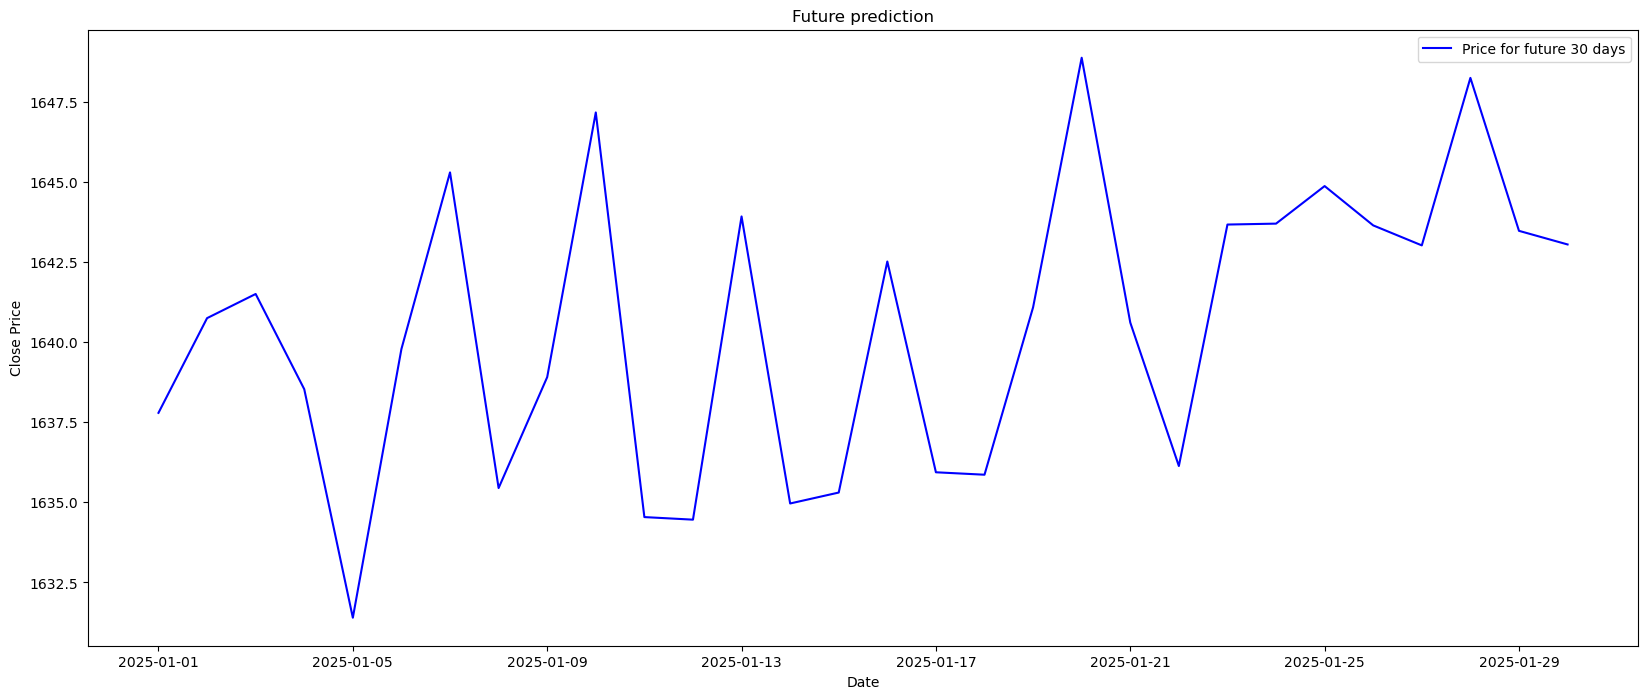

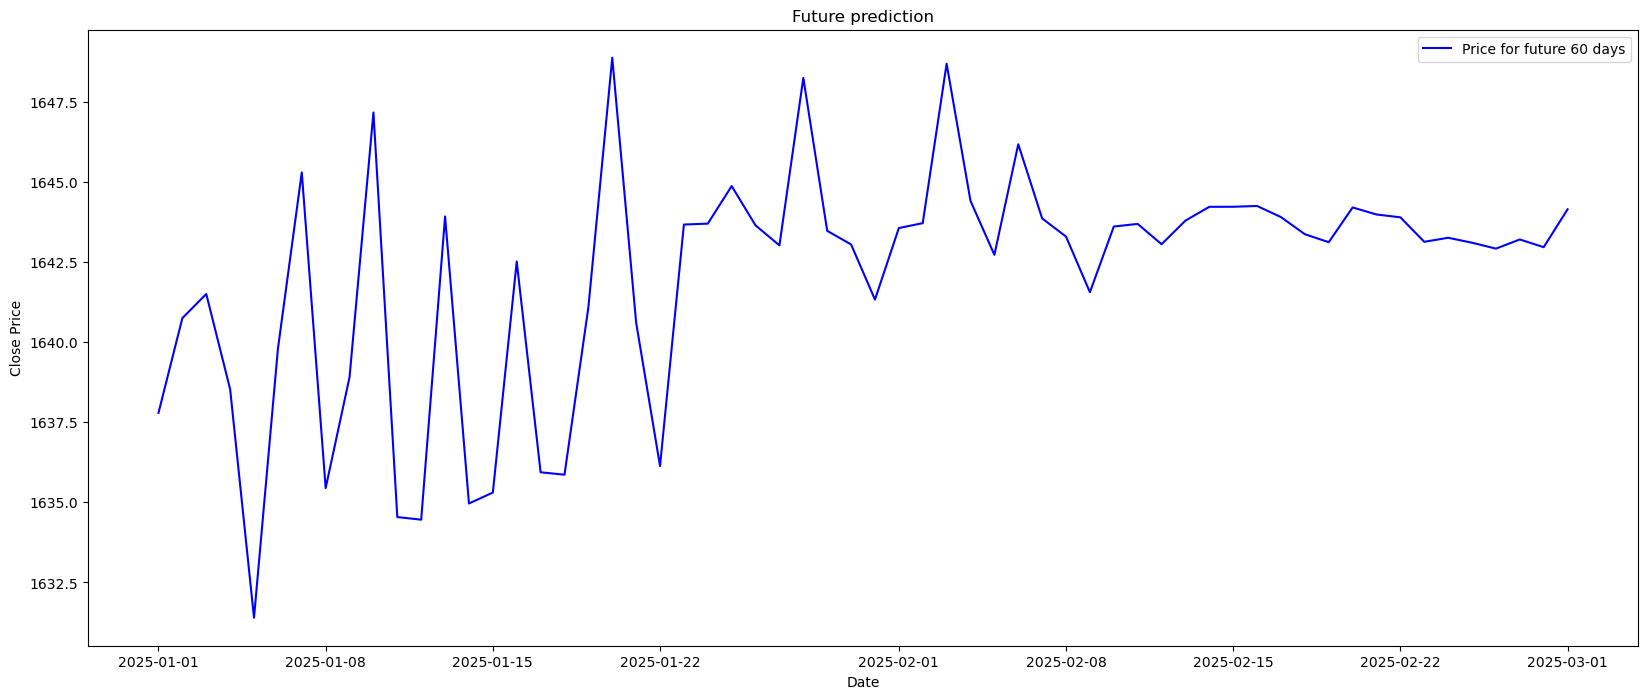

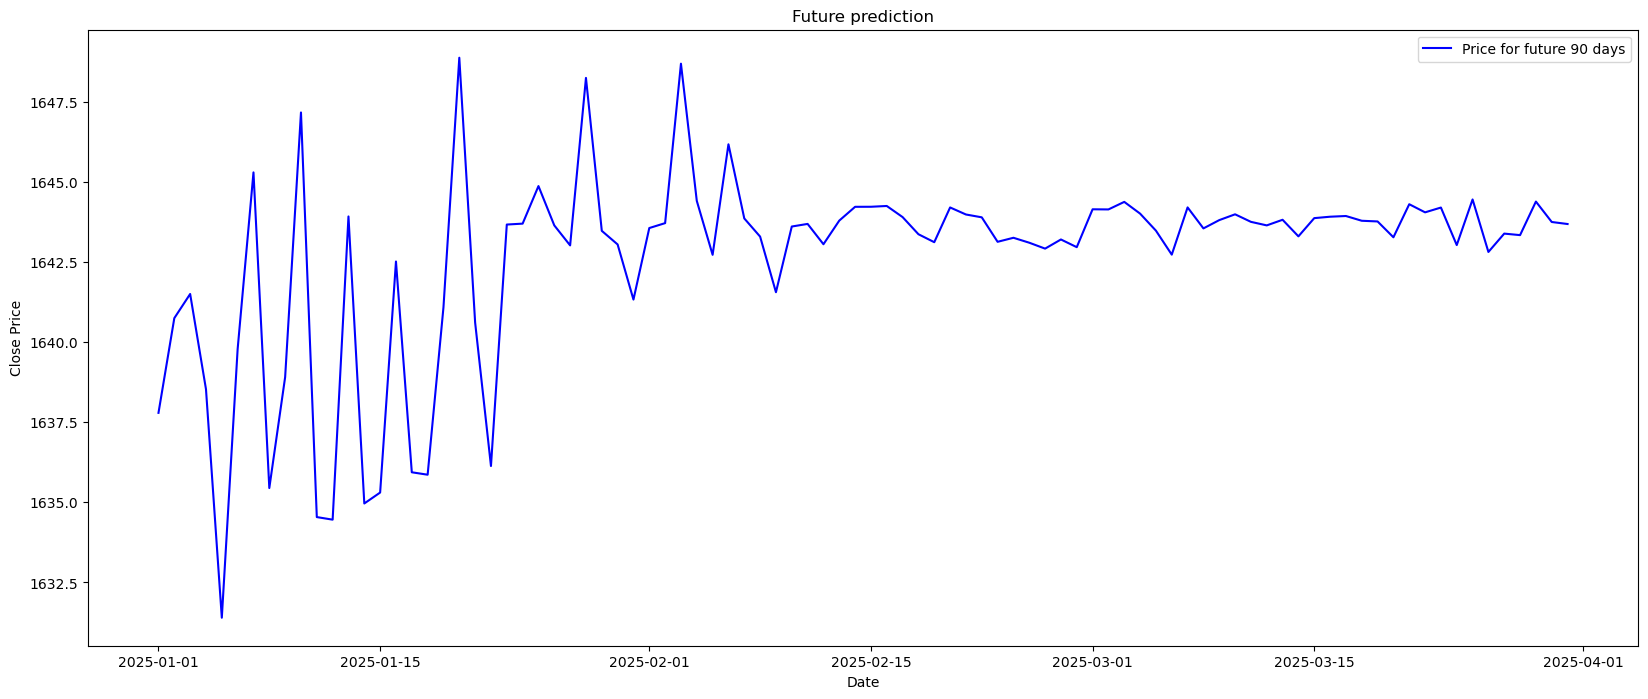

In [22]:

future_df = future_prediction(30)

plt.figure(figsize=(20,8))

plt.plot(future_df.index,future_df['Price'], color='blue',label='Price for future 30 days')
plt.title('Future prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

future_df = future_prediction(60)

plt.figure(figsize=(20,8))

plt.plot(future_df.index,future_df['Price'], color='blue',label='Price for future 60 days')
plt.title('Future prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

future_df = future_prediction(90)

plt.figure(figsize=(20,8))

plt.plot(future_df.index,future_df['Price'], color='blue',label='Price for future 90 days')
plt.title('Future prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

